# Bellabeat EDA


In [1]:
# Import relevant libraries and modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Load & Inspect Data 

Check for: 
1. Missing/null values 
2. Errors/Typos
3. Duplicates

Validate:
1. Check ranges and stats
2. Check data type
3. 



In [2]:
# Daily Activity Data (over 1-month period)

path_1 ='../data/dailyActivity_merged.csv'

df = pd.read_csv(path_1).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Change ActivityDate to Datetime type

df['ActivityDate'] = pd.to_datetime(df['ActivityDate']) 
df.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# Added datetime_is_numeric argument to validate date range
df.describe(datetime_is_numeric=True)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


In [6]:
df.groupby(by='Id').describe(datetime_is_numeric=True)

ActivityDate                                            \
                  count                 mean                  min   
Id                                                                  
1503960366           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
1624580081           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
1644430081           30  2016-04-26 12:00:00  2016-04-12 00:00:00   
1844505072           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
1927972279           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
2022484408           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
2026352035           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
2320127002           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
2347167796           18  2016-04-20 12:00:00  2016-04-12 00:00:00   
2873212765           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
3372868164           20  2016-04-21 12:00:00  2016-04-12 00:00:00   
3977333714           30  2016-04-26 12:00:00  2016-04-12 00:00:00   
4020332650           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
4057192912            4  2016-04-13 12:00:00  2016-04-12 00:00:00   
4319703577           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
4388161847           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
4445114986           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
4558609924           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
4702921684           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
5553957443           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
5577150313           30  2016-04-26 12:00:00  2016-04-12 00:00:00   
6117666160           28  2016-04-25 12:00:00  2016-04-12 00:00:00   
6290855005           29  2016-04-26 00:00:00  2016-04-12 00:00:00   
6775888955           26  2016-04-24 12:00:00  2016-04-12 00:00:00   
6962181067           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
7007744171           26  2016-04-24 12:00:00  2016-04-12 00:00:00   
7086361926           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
8053475328           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
8253242879           19  2016-04-21 00:00:00  2016-04-12 00:00:00   
8378563200           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
8583815059           31  2016-04-27 00:00:00  2016-04-12 00:00:00   
8792009665           29  2016-04-26 00:00:00  2016-04-12 00:00:00   
8877689391           31  2016-04-27 00:00:00  2016-04-12 00:00:00   

                                                                           \
                            25%                  50%                  75%   
Id                                                                          
1503960366  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
1624580081  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
1644430081  2016-04-19 06:00:00  2016-04-26 12:00:00  2016-05-03 18:00:00   
1844505072  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
1927972279  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
2022484408  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
2026352035  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
2320127002  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
2347167796  2016-04-16 06:00:00  2016-04-20 12:00:00  2016-04-24 18:00:00   
2873212765  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
3372868164  2016-04-16 18:00:00  2016-04-21 12:00:00  2016-04-26 06:00:00   
3977333714  2016-04-19 06:00:00  2016-04-26 12:00:00  2016-05-03 18:00:00   
4020332650  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
4057192912  2016-04-12 18:00:00  2016-04-13 12:00:00  2016-04-14 06:00:00   
4319703577  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
4388161847  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-04 12:00:00   
4445114986  2016-04-19 12:00:00  2016-04-27 00:00:00  2016-05-0

In [7]:
# Hourly Activity 

path_2 = '../data/hourlyCalories_merged.csv'
path_3 = '../data/hourlyIntensities_merged.csv'
path_4 = '../data/hourlySteps_merged.csv'
hour_cal = pd.read_csv(path_2).copy()
hour_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [8]:
hour_cal.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [9]:
hour_int = pd.read_csv(path_3).copy()
hour_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [10]:
hour_int.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [11]:
hour_steps = pd.read_csv(path_4).copy()
hour_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [12]:
hour_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [13]:
act_hour = pd.merge(hour_cal, hour_int, how='outer', on=['Id', 'ActivityHour'])
act_hour.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000


In [14]:
act_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [15]:
act_hour = pd.merge(act_hour, hour_steps, how='outer', on=['Id', 'ActivityHour'])
act_hour.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [16]:
# Change 'ActivityHour' to datetime
act_hour['ActivityHour'] = pd.to_datetime(act_hour['ActivityHour'])
act_hour.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


In [17]:
#act_hour.groupby(by=['Id', 'ActivityHour'])


In [20]:
# Minute Activity Data (Calories & Intensities & METS)

path_5 ='../data/minuteCaloriesNarrow_merged.csv'
path_6 ='../data/minuteIntensitiesNarrow_merged.csv'
path_7 ='../data/minuteMETsNarrow_merged.csv'


min_cal = pd.read_csv(path_5).copy()
min_cal.head()



,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [21]:
min_int = pd.read_csv(path_6).copy()
min_int.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [22]:
min_mets = pd.read_csv(path_7).copy()
min_mets.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [23]:
# Merge minute activity data

act_min = pd.merge(min_cal, min_int, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()


,Id,ActivityMinute,Calories,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [24]:
act_min = pd.merge(act_min, min_mets, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()





,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10


In [30]:
# Change ActivityMinute to datetime type

act_min['ActivityMinute'] = pd.to_datetime(act_min['ActivityMinute'])

act_min.head()





,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,2016-04-12 00:00:00,0.7865,0,10
1,1503960366,2016-04-12 00:01:00,0.7865,0,10
2,1503960366,2016-04-12 00:02:00,0.7865,0,10
3,1503960366,2016-04-12 00:03:00,0.7865,0,10
4,1503960366,2016-04-12 00:04:00,0.7865,0,10


In [34]:
# Sleep Data

path_8 = '../data/minuteSleep_merged.csv'
path_9 =  '../data/sleepDay_merged.csv'

sleep_min = pd.read_csv(path_8).copy()
sleep_min.head()



,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [42]:
sleep_min['date'] = pd.to_datetime(sleep_min['date'])
sleep_min.head()
                                

,Id,date,value,logId
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


In [35]:
sleep_day = pd.read_csv(path_9).copy()
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [44]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day.head()                           

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [45]:
# Heart Rate

path_10 = '../data/heartrate_seconds_merged.csv'

heartrate_df = pd.read_csv(path_10).copy()
heartrate_df.head()


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [46]:
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])
heartrate_df.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [47]:
# Weight Log

path_11 = '../data/weightLogInfo_merged.csv'

weight_df = pd.read_csv(path_11).copy()

weight_df.head()



,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [48]:
weight_df['Date'] = pd.to_datetime(weight_df['Date'])

weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


## Inspect Features

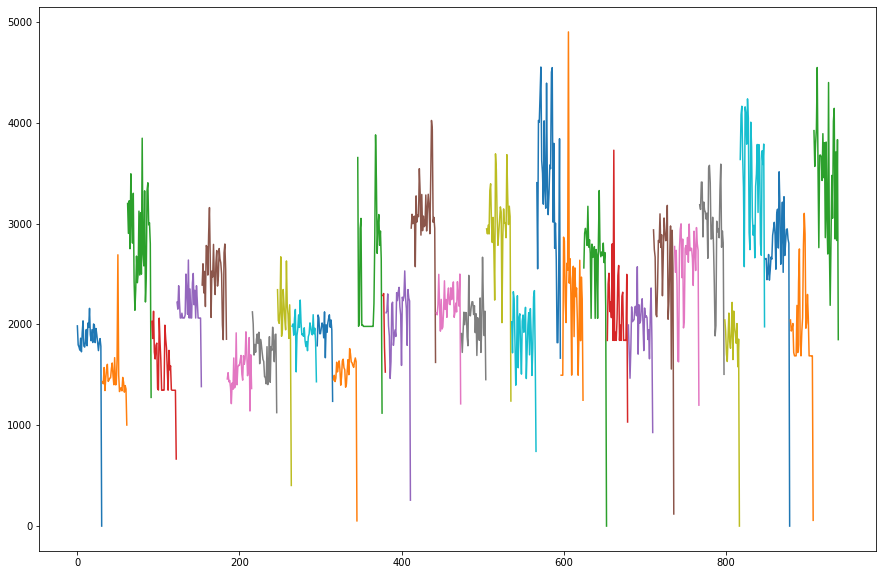

In [19]:
df.groupby(by='Id')['Calories'].plot(x='ActivityDate', y='Calories', figsize=(15,10 ));




